# FINANCIAL INCLUSION

# 1. Defining the Question

### a) Specifying the Question

> We are supposed to figure out how we can predict which individuals are most likely to have or use a bank account. This solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes. 

### b) Defining the Metric for Success

> On the metric that four in ten young adults have a bank account and 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

### c) Understanding the context 

> In recent times, financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.
> Access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### d) Recording the Experimental Design

1. Loading the datasets
2. Data Preparation
3. Investigating the dataset
4. Data cleaning
5. Exploratory Data Analysis(Univariate, Bivariate, Multivariate)
6. Answering the question
7. Conclusion
8. Recommendation
9. Follow up questions

### e) Data Relevance

We will measure the relevance after doing analysis of the dataset.

# 2. Reading the Data

## Importing Libraries

In [431]:
# Importing libraries
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# loading datasets

In [432]:
df = pd.read_csv('/home/addam/Downloads/core/core ipwk2/Financial Dataset - 1.csv')

In [433]:
v_names = pd.read_csv('/home/addam/Downloads/core/core ipwk2/VariableDefinitions.csv')

# 3. Checking the Data

In [434]:
# top of dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [435]:
# bottom of dataset

df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [436]:
# variable name definitions
v_names

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [437]:
# Determining the no. of records in our dataset
#
df.count()

country                   23510
year                      23524
uniqueid                  23524
Has a Bank account        23488
Type of Location          23509
Cell Phone Access         23513
household_size            23496
Respondent Age            23490
gender_of_respondent      23490
The relathip with head    23520
marital_status            23492
Level of Educuation       23495
Type of Job               23494
dtype: int64

In [438]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [439]:
# renaming columns

df.columns = ['country', 'year', 'uniqueid', 'has_a_bank_account','location_type', 'cellphone_access', 
'household_size', 'respondent_age', 'gender_of_respondent',
 'relationship_with_head', 'marital_status','education_level', 'job_type']

df.head()

,country,year,uniqueid,has_a_bank_account,location_type,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# 4. External Data Source Validation

> In this data ecosystem, being so abundant and our research questions more complex than ever before, we can no longer rely only on limited traditional Financial Inclusion (FI) data solutions. A variety of new data sources is now available.
> FinScope Consumer is a probability survey with an end user focus (individual or household) of financial services and products.
> According to world bank, We face big challenges to help the world’s poorest people and ensure that everyone sees benefits from economic growth. Data and research help us understand these challenges and set priorities, share knowledge of what works, and measure progress.
> At the World Bank Group (WBG), financial inclusion is approached in three dimensions – ‘Access, Usage, and Quality’ of financial services.  Fintech has the potential to lower costs, while increasing speed and accessibility, allowing for more tailored financial services that can scale. While globally 1.7 billion adults remain unbanked, fintech is helping make financial services more accessible to an increasing number of people.
> The aim is to give the 1.7 billion remaining unbanked —mostly poor, mostly women—access to basic financial services, and we are using fintech to help us.

# 5. Data Cleaning

### a. Validation

/home/addam/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/addam/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/addam/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

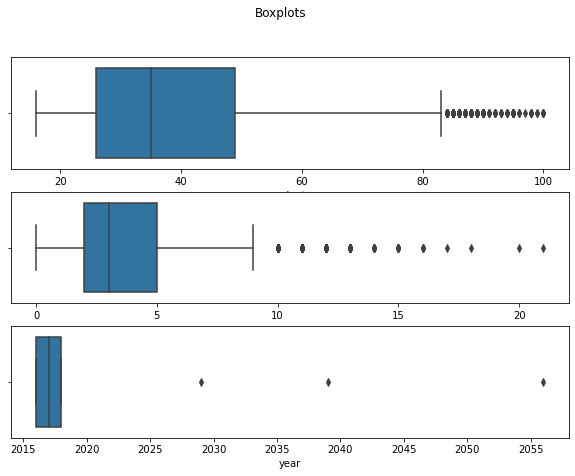

In [440]:
# Checking for Outliers
#
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(df['respondent_age'], ax=ax1)
sns.boxplot(df['household_size'], ax=ax2)
sns.boxplot(df['year'], ax=ax3)

plt.show()

As we can see from above, there are outliers.

## Dropping outliers

In [441]:
# Calculating our first, third quantiles and then later our IQR
# ---
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(df.shape)

(22903, 13)


/tmp/ipykernel_51370/928184786.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [442]:
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'location_type',
       'cellphone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

/home/addam/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/addam/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


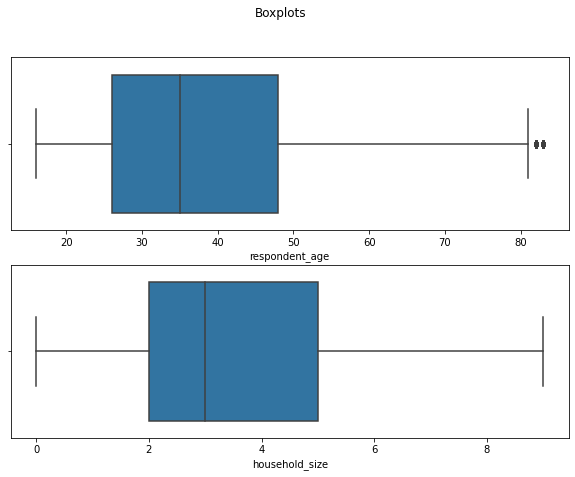

In [443]:
# confirming no outliers

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(df['respondent_age'], ax=ax1)
sns.boxplot(df['household_size'], ax=ax2)

plt.show()

There seems to be data within our range in the respondent age. 

## checking missing data

In [444]:
# Identifying the Missing Data
#
df.isnull().sum().sum()

263

In [445]:
df.shape

(22903, 13)

In [446]:
# Dealing with the Missing Data
#
df.dropna(inplace=True)

## checking duplicates

In [447]:
# checking duplicates and dropping
df.duplicated()
df.drop_duplicates().head()


,country,year,uniqueid,has_a_bank_account,location_type,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## checking anomalies

### using isolation forest

In [448]:
# household_size

from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=1000, contamination=0.08)
isolation_forest.fit(df['household_size'].values.reshape(-1, 1))
df['anomaly_score_rate_house'] = isolation_forest.decision_function(df['household_size'].values.reshape(-1, 1))
df['outlier_univariate_rate_house'] = isolation_forest.predict(df['household_size'].values.reshape(-1, 1))
df.head()

,country,year,uniqueid,has_a_bank_account,location_type,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,anomaly_score_rate_house,outlier_univariate_rate_house
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,0.066391,1
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,0.056785,1
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0.056785,1
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,0.056785,1
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,-0.068317,-1


In [449]:
# household_size with highest anomaly score rate
df['anomaly_score_rate_house'].max()

0.07932515960447944

In [450]:
# age 

from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=1000, contamination=0.08)
isolation_forest.fit(df['respondent_age'].values.reshape(-1, 1))
df['anomaly_score_rate_age'] = isolation_forest.decision_function(df['respondent_age'].values.reshape(-1, 1))
df['outlier_univariate_rate_age'] = isolation_forest.predict(df['respondent_age'].values.reshape(-1, 1))
df.head()

,country,year,uniqueid,has_a_bank_account,location_type,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,anomaly_score_rate_house,outlier_univariate_rate_house,anomaly_score_rate_age,outlier_univariate_rate_age
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,0.066391,1,0.076567,1
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,0.056785,1,0.005541,1
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0.056785,1,0.087850,1
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,0.056785,1,0.091025,1
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,-0.068317,-1,0.087850,1


In [451]:
# Respondents age  with highest anomaly score rate

df['anomaly_score_rate_age'].max()

0.1263710941107049

### Using quantile range

In [452]:
# Using quantile range
#
q1_30 = df['respondent_age'].quantile(.25)
q3_30 = df['respondent_age'].quantile(.75)

iqr_30 = q3_30 - q1_30


q1_64 = df['household_size'].quantile(.25)
q3_64 = df['household_size'].quantile(.75)

iqr_64 = q3_64 - q1_64



In [453]:
# first anomaly
iqr_30

22.0

In [454]:
# second anomaly
iqr_64

3.0

In [455]:
# More data cleaning procedures
#confirming no missing data
print(df.isnull().sum().sum())

0


In [456]:
# Fixing messy column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns

/tmp/ipykernel_51370/239815244.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'location_type',
       'cellphone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'anomaly_score_rate_house',
       'outlier_univariate_rate_house', 'anomaly_score_rate_age',
       'outlier_univariate_rate_age'],
      dtype='object')

In [457]:
# checking our data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        22725 non-null  object 
 1   year                           22725 non-null  int64  
 2   uniqueid                       22725 non-null  object 
 3   has_a_bank_account             22725 non-null  object 
 4   location_type                  22725 non-null  object 
 5   cellphone_access               22725 non-null  object 
 6   household_size                 22725 non-null  float64
 7   respondent_age                 22725 non-null  float64
 8   gender_of_respondent           22725 non-null  object 
 9   relationship_with_head         22725 non-null  object 
 10  marital_status                 22725 non-null  object 
 11  education_level                22725 non-null  object 
 12  job_type                       22725 non-null 

# 6. Exploratory Data Analysis: 

## Univariate analysis

In [458]:
# Ploting the univariate summaries and recording our observations

# mean household_size & respondent_age

df[['household_size','respondent_age']].mean()

household_size     3.579846
respondent_age    38.347987
dtype: float64

The mean household size was 3 and age of 38

In [459]:
# max household_size &respondent_age
df[['household_size','respondent_age']].max()

household_size     9.0
respondent_age    83.0
dtype: float64

In [460]:
# min household_size & respondent_age
df[['household_size','respondent_age']].min()

household_size     0.0
respondent_age    16.0
dtype: float64

In [461]:
# std household_size & respondent_age

df[['household_size','respondent_age']].std()

household_size     2.080542
respondent_age    15.806141
dtype: float64

In [462]:
# quantiles

df['household_size'].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [463]:
# skewness
df['household_size'].skew()

0.6058745818063943

<AxesSubplot:>

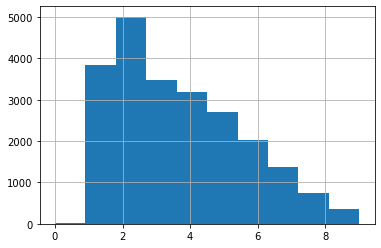

In [464]:
# histogram for household size 
df['household_size'].hist()

The column is positively skewed.This shows that the tail on the right side of the curve is bigger than that on the left side.The mean is greater than the mode.

In [465]:
# skewness
df['respondent_age'].skew()

0.7402138281724044

/home/addam/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


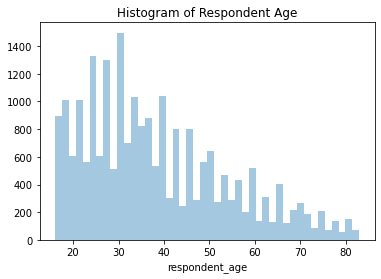

In [466]:
# Histogram of Respondent Age
sns.distplot(df.respondent_age, kde=False )

plt.title('Histogram of Respondent Age')
plt.show();

The Respondent age column is also positively skewed.This shows that the tail on the right side of the curve is bigger than that on the left side.The mean is greater than the mode.

In [467]:
# kurtosis household_size
df['household_size'].kurt()

-0.5055780598336774

In [468]:
# kurtosis respondent_age
df['respondent_age'].kurt()

-0.23749387799691757

The kurtosis is Platykurtic in both variables(This is when the tail of the distribution is light( no outlier) and kurtosis is lesser than that of the normal distribution.)This confirms that there are no outliers anymore.

In [469]:
df[['household_size', 'respondent_age']].describe()

,household_size,respondent_age
count,22725.000000,22725.000000
mean,3.579846,38.347987
std,2.080542,15.806141
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,48.000000
max,9.000000,83.000000


### categorical

In [470]:
''' def category(x):
    
    df.value_counts().plot(df[x], kind = 'barh')
    plt.title('East Africa info')


category('country')'''

" def category(x):\n    \n    df.value_counts().plot(df[x], kind = 'barh')\n    plt.title('East Africa info')\n\n\ncategory('country')"

Text(0.5, 1.0, 'East Africa info')

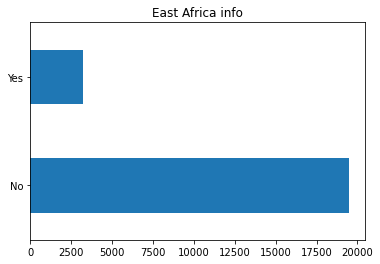

In [471]:
# with accounts
df.has_a_bank_account.value_counts().plot(kind='barh')

plt.title('East Africa info')

Most people do not have bank accounts from the chart above.

Text(0.5, 1.0, 'East Africa info')

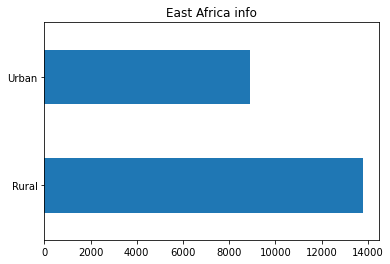

In [472]:
# location
df.location_type.value_counts().plot(kind='barh')

plt.title('East Africa info')

Most people from this study were from rural areas

## Bivariate analysis

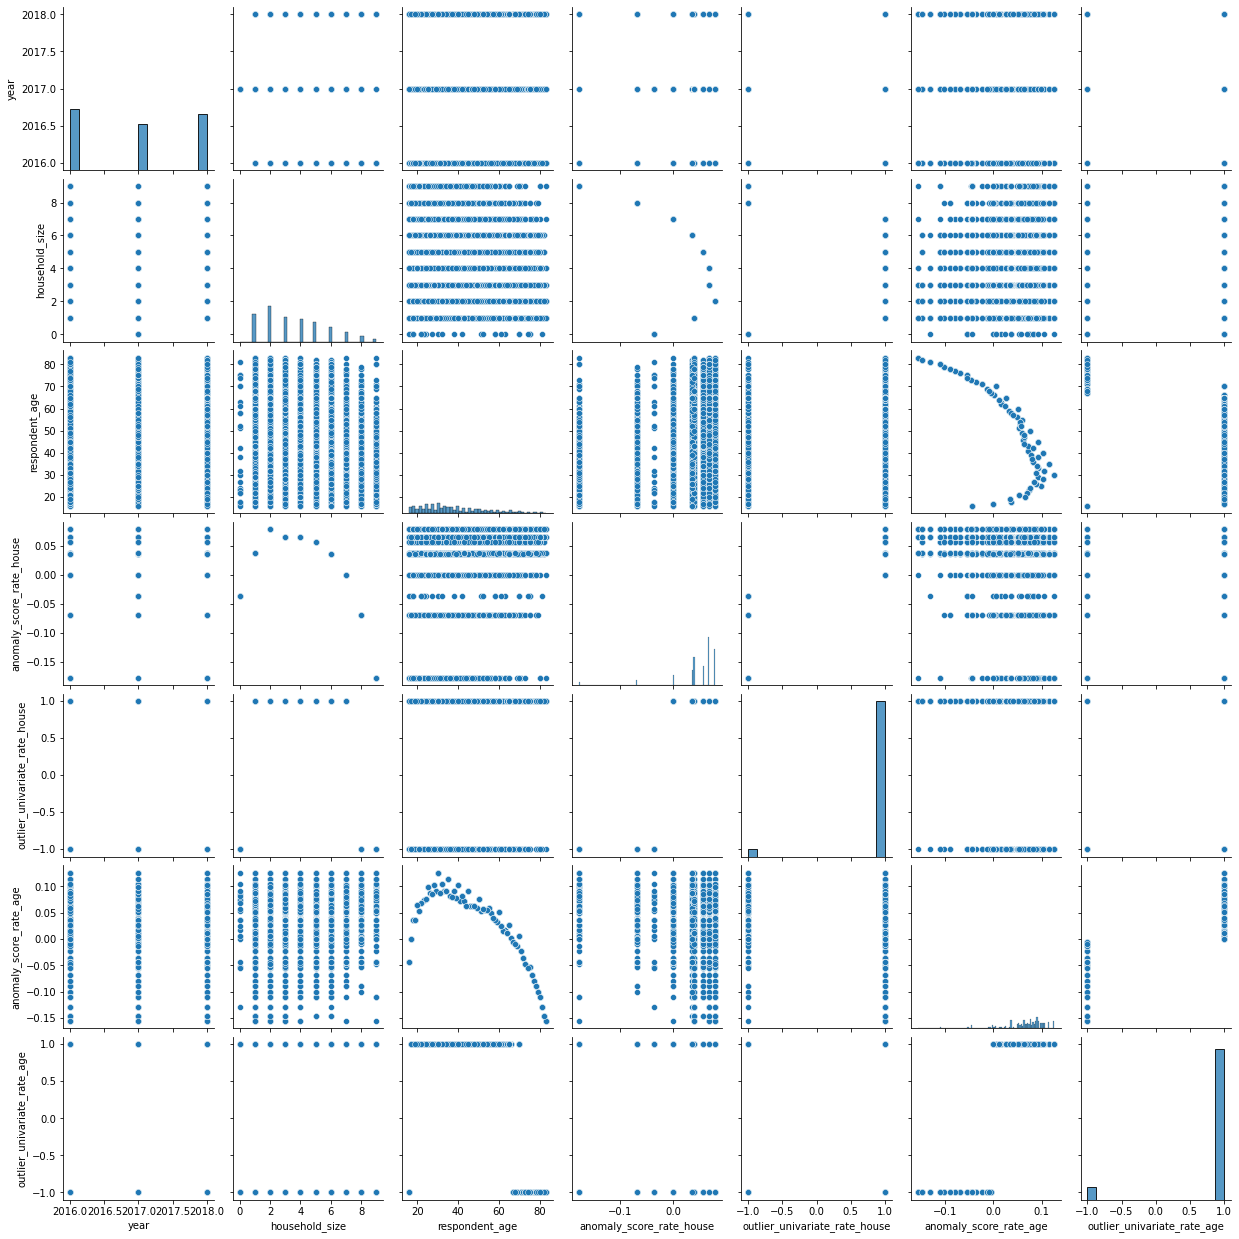

In [473]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df)
plt.show()

In [474]:
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'location_type',
       'cellphone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type', 'anomaly_score_rate_house',
       'outlier_univariate_rate_house', 'anomaly_score_rate_age',
       'outlier_univariate_rate_age'],
      dtype='object')

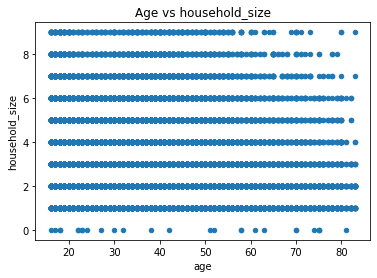

In [475]:
# Using Pandas: Plotting our scatterplot to compare the variables
df.plot(x = 'respondent_age', y = 'household_size', kind='scatter')

# Giving our scatterplot a title
plt.title('Age vs household_size')

# Labelling our x axis
plt.xlabel('age')

# Labelling our y axis
plt.ylabel('household_size')

# We then display our scatterplot as shown below
plt.show()

According to the above graphs, the household size decreases as the age increases which seems viable.

In [476]:
# general correlation
df.corr()

,year,household_size,respondent_age,anomaly_score_rate_house,outlier_univariate_rate_house,anomaly_score_rate_age,outlier_univariate_rate_age
year,1.000000,-0.096684,-0.023538,-0.017741,-0.018647,0.006276,0.008204
household_size,-0.096684,1.000000,-0.106209,-0.622564,-0.497116,0.076040,0.068375
respondent_age,-0.023538,-0.106209,1.000000,0.022213,0.024318,-0.491454,-0.383939
anomaly_score_rate_house,-0.017741,-0.622564,0.022213,1.000000,0.823664,-0.004482,-0.017617
outlier_univariate_rate_house,-0.018647,-0.497116,0.024318,0.823664,1.000000,-0.004265,-0.018686
anomaly_score_rate_age,0.006276,0.076040,-0.491454,-0.004482,-0.004265,1.000000,0.752372
outlier_univariate_rate_age,0.008204,0.068375,-0.383939,-0.017617,-0.018686,0.752372,1.000000


<AxesSubplot:>

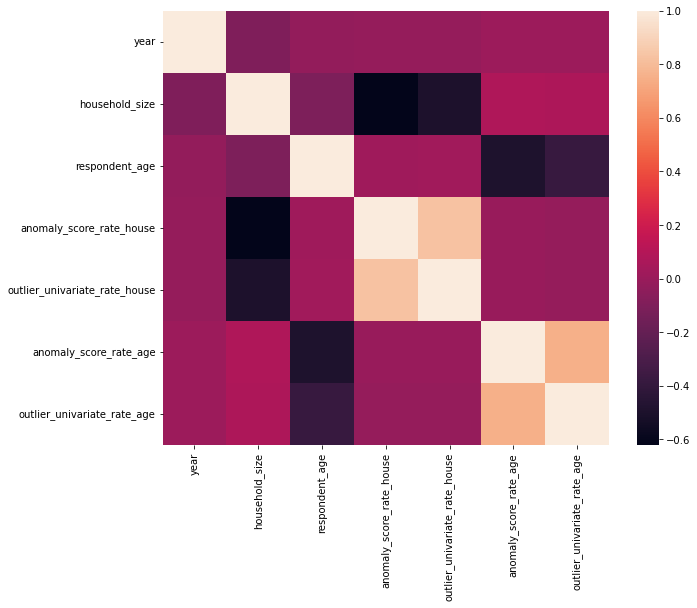

In [477]:
# heatmap
columns = ('household_size', 'respondent_age')
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [478]:
# correlation
# Calculating the pearson coefficient
pc = df["respondent_age"].corr(df["household_size"], method="pearson") 
print(pc)

# Checking whether you have to define the pearson
coeff = df["respondent_age"].corr(df["household_size"]) 
print(coeff)

-0.10620882169759868
-0.10620882169759868


The above results show a negative relationship between the two variables since the correlation coefficient is less than 0. This is an indication that both variables move in the opposite direction. Therefore, if one variable increases, the other variable decreases with the same magnitude (and vice versa).

In [479]:
df.head()

,country,year,uniqueid,has_a_bank_account,location_type,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,anomaly_score_rate_house,outlier_univariate_rate_house,anomaly_score_rate_age,outlier_univariate_rate_age
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,0.066391,1,0.076567,1
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,0.056785,1,0.005541,1
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0.056785,1,0.087850,1
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,0.056785,1,0.091025,1
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,-0.068317,-1,0.087850,1


### categorical 

<AxesSubplot:xlabel='country', ylabel='respondent_age'>

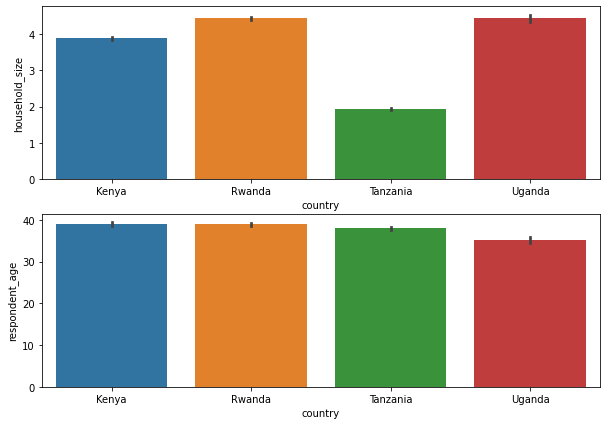

In [480]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 7))
fig.suptitle('')
sns.barplot(x = df.country, y = df.household_size, ax=ax1)
sns.barplot(x = df.country, y= df.respondent_age, ax=ax2)

Uganda and Rwanda had the most household size.
The countries had subjects who were upto above 35 years.

<AxesSubplot:xlabel='location_type', ylabel='respondent_age'>

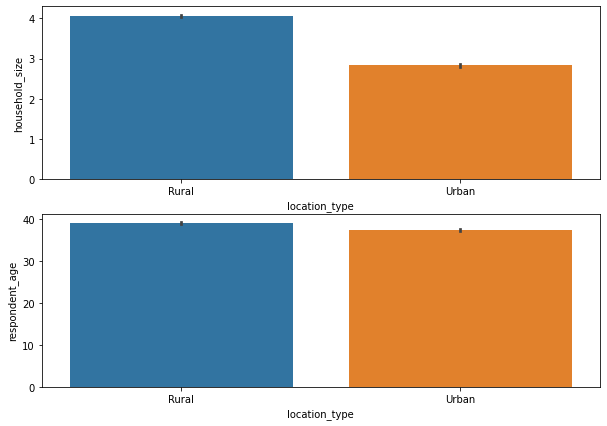

In [481]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 7))
fig.suptitle('')
sns.barplot(x = df.location_type, y = df.household_size, ax=ax1)
sns.barplot(x = df.location_type, y= df.respondent_age, ax=ax2)

This chart also confirms that the rural areas had a large household and older people.

<AxesSubplot:xlabel='cellphone_access', ylabel='respondent_age'>

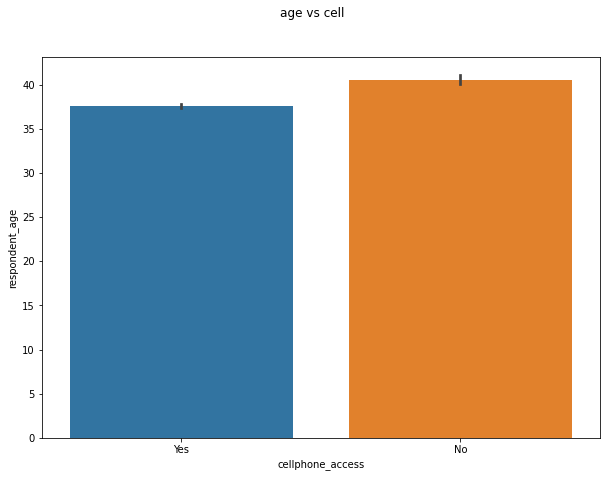

In [482]:
fig, (ax1) = plt.subplots(1, figsize=(10, 7))
fig.suptitle('age vs cell')
sns.barplot(x = df.cellphone_access, y = df.respondent_age, ax=ax1)

Generally, most people had cell phone access.

<AxesSubplot:xlabel='gender_of_respondent', ylabel='respondent_age'>

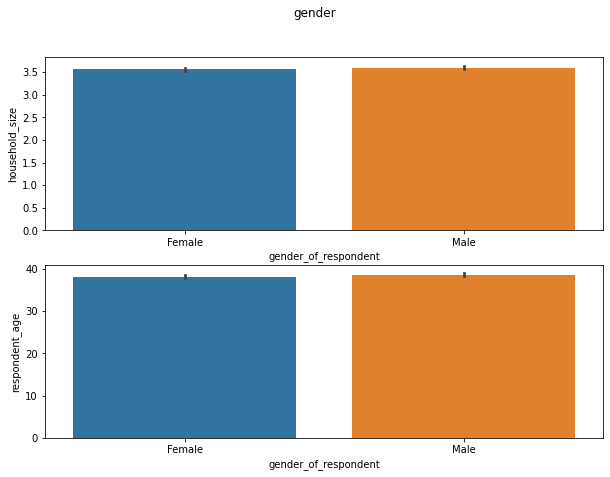

In [483]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 7))
fig.suptitle('gender')
sns.barplot(x = df.gender_of_respondent, y = df.household_size, ax=ax1)
sns.barplot(x = df.gender_of_respondent, y= df.respondent_age, ax=ax2)

The household was equally distributed in both genders.
The male had slightly more older people than female.

<AxesSubplot:xlabel='relationship_with_head', ylabel='respondent_age'>

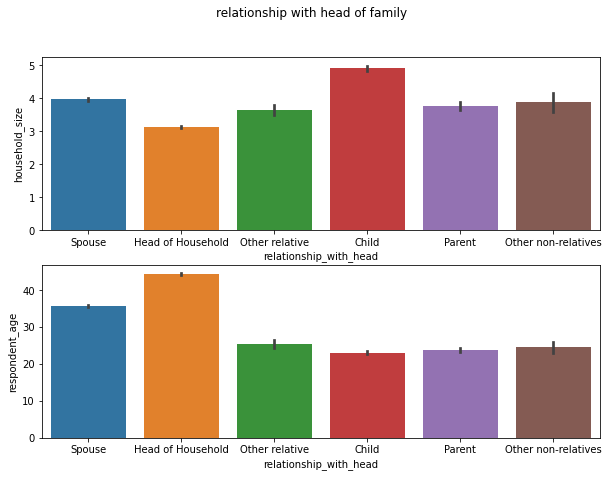

In [484]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 7))
fig.suptitle('relationship with head of family')
sns.barplot(x = df.relationship_with_head, y = df.household_size, ax=ax1)
sns.barplot(x = df.relationship_with_head, y= df.respondent_age, ax=ax2)

It is evident that the head of the household were more than the rest followed by their spouses.

<AxesSubplot:xlabel='marital_status', ylabel='respondent_age'>

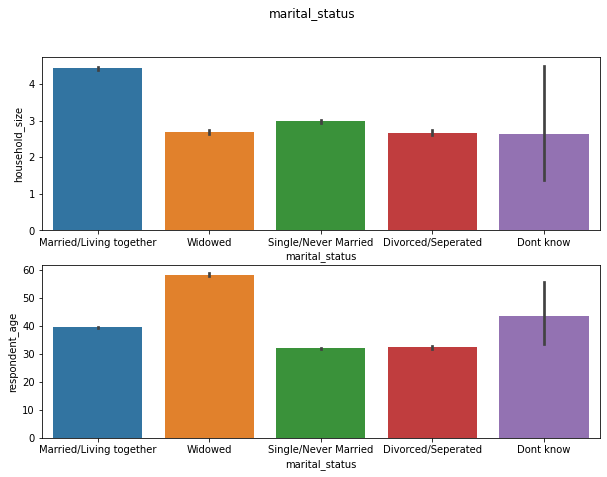

In [485]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 7))
fig.suptitle('marital_status')
sns.barplot(x = df.marital_status, y = df.household_size, ax=ax1)
sns.barplot(x = df.marital_status, y= df.respondent_age, ax=ax2)

According to the results above, those who were married or living together had larger household sizes.
Also, we can say that the widowed more.

<AxesSubplot:xlabel='education_level', ylabel='respondent_age'>

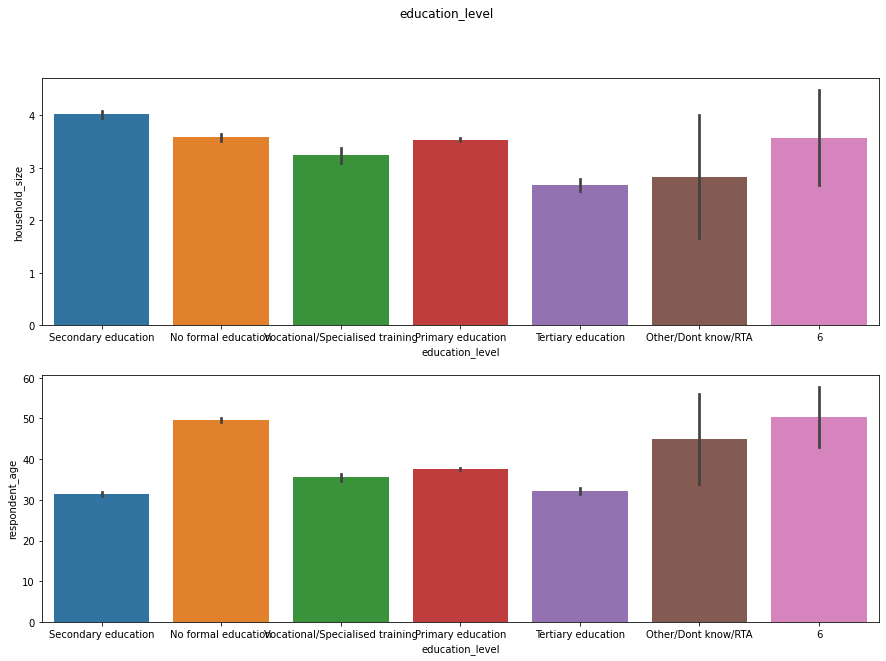

In [486]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 10))
fig.suptitle('education_level')
sns.barplot(x = df.education_level, y = df.household_size, ax=ax1)
sns.barplot(x = df.education_level, y= df.respondent_age, ax=ax2)

Most people who reached Secondary had a large household size
Most people had reached the age of 50.

<AxesSubplot:xlabel='job_type', ylabel='respondent_age'>

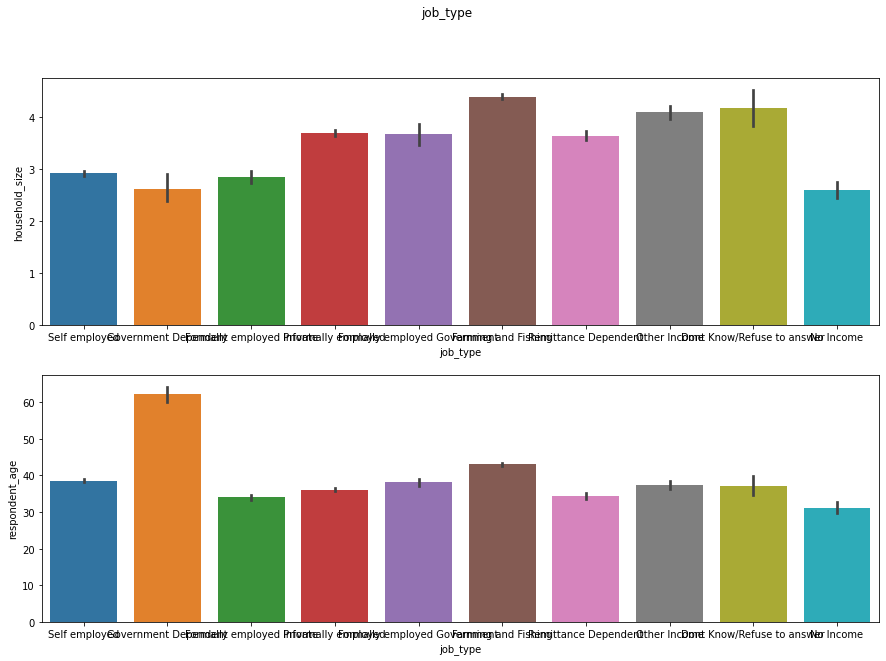

In [487]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 10))
fig.suptitle('job_type')
sns.barplot(x = df.job_type, y = df.household_size, ax=ax1)
sns.barplot(x = df.job_type, y= df.respondent_age, ax=ax2)

From the above results, most people who had a large household size were employed by the government.

### recommendation

We would recommend that the people who live in the rural areas to be focused on in terms of financial plans. This is because they are the same group which has large households.
Also the government should create more job opportunities since it has the largest share of employees.

## Multivariate analysis

In [488]:
# changing columns into categorical
# label encoding

encoding = df.copy(deep = True)
encoding['country'] = encoding['country'].astype('category')
encoding['location_type'] = encoding['location_type'].astype('category')
encoding['cellphone_access'] = encoding['cellphone_access'].astype('category')
encoding['gender_of_respondent'] = encoding['gender_of_respondent'].astype('category')
encoding['relationship_with_head'] = encoding['relationship_with_head'].astype('category')
encoding['education_level'] = encoding['education_level'].astype('category')
encoding['job_type'] = encoding['job_type'].astype('category')
encoding['marital_status'] = encoding['marital_status'].astype('category')
encoding.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   country                        22725 non-null  category
 1   year                           22725 non-null  int64   
 2   uniqueid                       22725 non-null  object  
 3   has_a_bank_account             22725 non-null  object  
 4   location_type                  22725 non-null  category
 5   cellphone_access               22725 non-null  category
 6   household_size                 22725 non-null  float64 
 7   respondent_age                 22725 non-null  float64 
 8   gender_of_respondent           22725 non-null  category
 9   relationship_with_head         22725 non-null  category
 10  marital_status                 22725 non-null  category
 11  education_level                22725 non-null  category
 12  job_type                       2

In [489]:
# performing label encoding

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

encoding['country'] = labelencoder.fit_transform(encoding['country'])
encoding['location_type'] = labelencoder.fit_transform(encoding['location_type'])
encoding['cellphone_access'] = labelencoder.fit_transform(encoding['cellphone_access'])
encoding['gender_of_respondent'] = labelencoder.fit_transform(encoding['gender_of_respondent'])
encoding['relationship_with_head'] = labelencoder.fit_transform(encoding['relationship_with_head'])
encoding['education_level'] = labelencoder.fit_transform(encoding['education_level'])
encoding['job_type'] = labelencoder.fit_transform(encoding['job_type'])
encoding['marital_status'] = labelencoder.fit_transform(encoding['marital_status'])

encoding.head()

,country,year,uniqueid,has_a_bank_account,location_type,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,anomaly_score_rate_house,outlier_univariate_rate_house,anomaly_score_rate_age,outlier_univariate_rate_age
0,0,2018,uniqueid_1,Yes,0,1,3.0,24.0,0,5,2,4,9,0.066391,1,0.076567,1
1,0,2018,uniqueid_2,No,0,0,5.0,70.0,0,1,4,1,4,0.056785,1,0.005541,1
2,0,2018,uniqueid_3,Yes,1,1,5.0,26.0,1,3,3,6,9,0.056785,1,0.087850,1
3,0,2018,uniqueid_4,No,0,1,5.0,34.0,0,1,2,3,3,0.056785,1,0.091025,1
4,0,2018,uniqueid_5,No,1,0,8.0,26.0,1,0,3,3,5,-0.068317,-1,0.087850,1


In [490]:
# general statistics 
encoding.describe(include='all')

,country,year,uniqueid,has_a_bank_account,location_type,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,anomaly_score_rate_house,outlier_univariate_rate_house,anomaly_score_rate_age,outlier_univariate_rate_age
count,22725.000000,22725.000000,22725,22725,22725.000000,22725.000000,22725.000000,22725.000000,22725.000000,22725.000000,22725.000000,22725.000000,22725.000000,22725.000000,22725.000000,22725.000000,22725.000000
unique,NaN,NaN,8645,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,uniqueid_1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4,19490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.193531,2016.968185,NaN,NaN,0.392299,0.747415,3.579846,38.347987,0.410473,2.223586,2.382838,3.007833,5.413597,0.048546,0.901430,0.064779,0.845457
std,0.917396,0.846366,NaN,NaN,0.488274,0.434505,2.080542,15.806141,0.491930,1.896399,0.996767,1.202492,3.090161,0.041595,0.432934,0.045398,0.534056
min,0.000000,2016.000000,NaN,NaN,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.177448,-1.000000,-0.155546,-1.000000
25%,0.000000,2016.000000,NaN,NaN,0.000000,0.000000,2.000000,26.000000,0.000000,1.000000,2.000000,3.000000,2.000000,0.039072,1.000000,0.053509,1.000000
50%,1.000000,2017.000000,NaN,NaN,0.000000,1.000000,3.000000,35.000000,0.000000,1.000000,2.000000,3.000000,5.000000,0.066391,1.000000,0.076567,1.000000
75%,2.000000,2018.000000,NaN,NaN,1.000000,1.000000,5.000000,48.000000,1.000000,5.000000,3.000000,4.000000,9.000000,0.066848,1.000000,0.091689,1.000000


## principal component analysis

In [515]:
# preprocessing

X = encoding.drop(['has_a_bank_account', 'uniqueid'], axis = 1)
y = encoding['has_a_bank_account']

In [492]:
# Step 4: Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [493]:
# Step 5: Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [494]:
# step 6: applying pca

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [495]:
# Step 7: Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.1714763 , 0.15906583, 0.11330935, 0.10446019, 0.07776252,
       0.06629883, 0.06024173, 0.05146754, 0.04492384, 0.03780016,
       0.03318973, 0.02902517, 0.02546073, 0.0152646 , 0.01025346])

In [496]:
# Step 8: Using 1 Principal Component

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [497]:
# Step 9: Training and Making Predictions
# using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [498]:
# Step 10: Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3896    0]
 [ 649    0]]
Accuracy 0.8572057205720572


# 7. Implementing the Solution

In [499]:
# Checking people having a bank avccount

bank = df[df['has_a_bank_account'] == 'Yes']
bank

,country,year,uniqueid,has_a_bank_account,location_type,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,anomaly_score_rate_house,outlier_univariate_rate_house,anomaly_score_rate_age,outlier_univariate_rate_age
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,0.066391,1,0.076567,1
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0.056785,1,0.087850,1
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing,0.066391,1,0.054737,1
11,Kenya,2018,uniqueid_12,Yes,Rural,Yes,3.0,69.0,Male,Head of Household,Married/Living together,Secondary education,Other Income,0.066391,1,-0.013340,-1
17,Kenya,2018,uniqueid_18,Yes,Rural,Yes,6.0,27.0,Female,Head of Household,Married/Living together,Secondary education,Self employed,0.036216,1,0.084802,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23324,Uganda,2018,uniqueid_1902,Yes,Rural,Yes,3.0,23.0,Female,Spouse,Married/Living together,Secondary education,Self employed,0.066391,1,0.074039,1
23327,Uganda,2018,uniqueid_1905,Yes,Urban,Yes,1.0,24.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income,0.039072,1,0.076567,1
23331,Uganda,2018,uniqueid_1909,Yes,Rural,Yes,3.0,26.0,Female,Head of Household,Married/Living together,Secondary education,Other Income,0.066391,1,0.087850,1
23351,Uganda,2018,uniqueid_1929,Yes,Rural,Yes,5.0,36.0,Female,Head of Household,Widowed,Primary education,No Income,0.056785,1,0.082569,1


In [500]:
# Countries for people who have bank accounts
bank.country.value_counts()

Kenya       1491
Rwanda       980
Tanzania     598
Uganda       166
Name: country, dtype: int64

Kenya stands with most people with bank accounts.

In [501]:
# accounts per year
bank.year.value_counts()

2018    1657
2016     980
2017     598
Name: year, dtype: int64

The number of bank accounts increases yearly. however, due to different date of data collection, we cannot conclude that is correct because the data for the countries was collected on different years.

In [502]:
# account location total
bank.location_type.value_counts()

Urban    1620
Rural    1615
Name: location_type, dtype: int64

As expected, most people with bank accoubts are from urban centers.

In [503]:
# number with cell phones
bank.cellphone_access.value_counts()

Yes    3142
No       93
Name: cellphone_access, dtype: int64

We once again observe that most people have cell phone access.

In [504]:
# accounts per age
bank.respondent_age.value_counts()

30.0    175
35.0    134
32.0    125
28.0    125
40.0    122
       ... 
77.0      6
82.0      5
16.0      5
81.0      3
83.0      2
Name: respondent_age, Length: 68, dtype: int64

In [505]:
# max age
bank.respondent_age.value_counts().max()

175

From the above results, most people with bank accounts were aged 30.

In [506]:
# accounts per gender
bank.gender_of_respondent.value_counts()

Male      1782
Female    1453
Name: gender_of_respondent, dtype: int64

The male gender clearly dominated the female in terms of the number of people who have bank accounts.

In [507]:
# who has account
bank.relationship_with_head.value_counts()

Head of Household      2221
Spouse                  688
Child                   185
Other relative           64
Parent                   58
Other non-relatives      19
Name: relationship_with_head, dtype: int64

The head of the household was the one who has a bank account according to the above results. 

In [508]:
# marital status with account
bank.marital_status.value_counts()

Married/Living together    1827
Single/Never Married        946
Widowed                     230
Divorced/Seperated          230
Dont know                     2
Name: marital_status, dtype: int64

The people married or living together were the ones who topped in having bank accounts.

In [509]:
# education level with accounts
bank.education_level.value_counts()

Primary education                  1061
Secondary education                 968
Tertiary education                  584
Vocational/Specialised training     450
No formal education                 161
Other/Dont know/RTA                   6
6                                     5
Name: education_level, dtype: int64

The people who acquired primary education alone were the most with bank accounts. Very few who had no formal education had bank accounts.

In [510]:
# job type with accounts
bank.job_type.value_counts()

Self employed                   835
Farming and Fishing             620
Formally employed Private       564
Informally employed             438
Formally employed Government    297
Remittance Dependent            230
Other Income                    183
Government Dependent             41
Dont Know/Refuse to answer       14
No Income                        13
Name: job_type, dtype: int64

The self employed people were the most with bank accounts.

# Conclusion

It is safe to conclude that most of the factors in this study affected the chances of a person having a bank account or not.
However, the location and id did not really matter. 

# 8. Challenging the solution

We will challenge this solution with another test.

In [512]:
# using two pca components
pca = PCA(n_components=)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

We can then conclude that the other components do not directly affect the probability of a person having a = bank account or not.

# Recommendation

We recommend that the data for financial inclusion to include other variables like: rental status, driving etc. For more accuracy, we also recommend that the data be given per year for each country.

# 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

The data proved to be sufficient despite the few errors. However, more data was needed.

### b). Do we need other data to answer our question?

We are confident to say that we need more data with more categories for analysis. Also, the data was from different years per country making it hard to do comparison.

### c). Did we have the right question?

From the above analysis and conclusions, we can say that we had the right question as several factors affected the probabilty of a person having a bank account i.e. age, job type etc